In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, bordes, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        self.bordes=bordes
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.Pz= np.zeros(len(t))
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.Pe = np.zeros(len(t))
        
        
    def Evolution(self,i):
        
        # quitar esto para agregar los muros
        """
        choque=self.colisionbordes()
        
        if choque != False:
            if choque[1]=='vx':
                self.v[0]=-self.v[0]
            if choque[1]=='vy':
                self.v[1]=-self.v[1]"""
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
        
#        self.r += self.dt*self.v
#        self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p,i):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            
        
            # Energia potencial
            
            E=((1/4)*self.K*compresion**4)/2
            self.Pe[i]=E
        
        
        
     
    # Aca debes agregar la energía potencial

    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
        
       
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialenergy(self,scale=1):
        return self.Pe[::scale] 
    
    def GetPotentialenergyForce(self,scale=1):
        return self.Peforce[::scale] 
    
    def GetPz(self,scale):
        return self.Pz[::scale]
    
    
    # Debes agregar las paredes en este punto
    
    def colisionbordes(self):
        choque = False
        lim_sup =self.bordes[0][1]
        lim_inf= self.bordes[0][0]
        
        if (self.r[0] + self.radius) >= lim_sup: #Verifica choque con la parte derecha de la caja
            choque= (True,'vx') # Regresa que hay choque y el eje de V que debe cambiar de signo
            
        elif (self.r[1] + self.radius) >= lim_sup: # Verifica choque con la parte superior de la caja
            choque= (True,'vy') 
            
        elif (self.r[0] - self.radius) <= lim_inf : #Verifica choque con la parte izquierda de la caja
            choque= (True,'vx')
            
        elif (self.r[1] - self.radius) <= lim_inf: #Verifica choque con la parte inferior de la caja
            choque= (True,'vy')
        
        return False

In [3]:
def solapar(particles,rx,ry):
    solapar=False
    
    for p in particles:
        px=p.r[0]
        py=p.r[1]
            
        if (rx+px)**2 + (ry-py)**2 <= 2:
            solapar=True
            
    return solapar
    
    
def GetParticles(N,t,bordes):
    
    particles=[]
    
    rx=np.random.uniform(0,bordes[0][1]-2)
    ry=np.random.uniform(0,bordes[0][1]-2)
    
    v= np.random.uniform(-5,5.,) # normal aleatoria de la velocidad
    angulo=np.random.uniform(0,2*np.pi) #escoge un angulo aleatorio
    vx=v*np.cos(angulo) # vx de la velocidad
    vy= v*np.sin(angulo) # vy de la velocidad
    
    # Asignacion de parametros
    r0=np.array([rx,ry])
    v0=np.array([vx,vy])
    a0=np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,bordes,m=1,radius=2,Id=0)
    
    particles.append(p0)
    
    
    for _ in range(N-1): #evalua cada particula
        
        if len (particles) >=1:
            seguir= True
            while seguir == True:
                rx=np.random.uniform(-(bordes[0][1]-2),bordes[0][1]-2)
                ry=np.random.uniform(-(bordes[0][1]-2),bordes[0][1]-2)
            
                solapa=solapar(particles,rx,ry)
                
                if solapa == False:
                    
                    seguir = False
                    # Creacion aleatoria de v 
                    v= np.random.uniform(-5.,5.) # normal aleatoria de la velocidad
                    angulo=np.random.uniform(0,2*np.pi) #escoge un angulo aleatorio
                    vx=v*np.cos(angulo) # vx de la velocidad
                    vy= v*np.sin(angulo) # vy de la velocidad
                    
                    # Asignacion de parametros
                    r0=np.array([rx,ry])
                    v0=np.array([vx,vy])
                    a0=np.array([0.,0.])
                    
                    # Creacion de la particula
                    p0 = Particle(r0,v0,a0,t,bordes,m=1,radius=2,Id=0)
                    particles.append(p0)
                    
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return particles

In [4]:
bordes=[[-20,20],[-20,20]]
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t,bordes)

In [5]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j],it)
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [6]:
Particles = RunSimulation(t,Particles)

Running simulation:   2%|▏         | 156/10000 [00:00<00:06, 1557.54 Steps/s]

Running simulation: 100%|██████████| 10000/10000 [00:04<00:00, 2010.67 Steps/s]


In [7]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

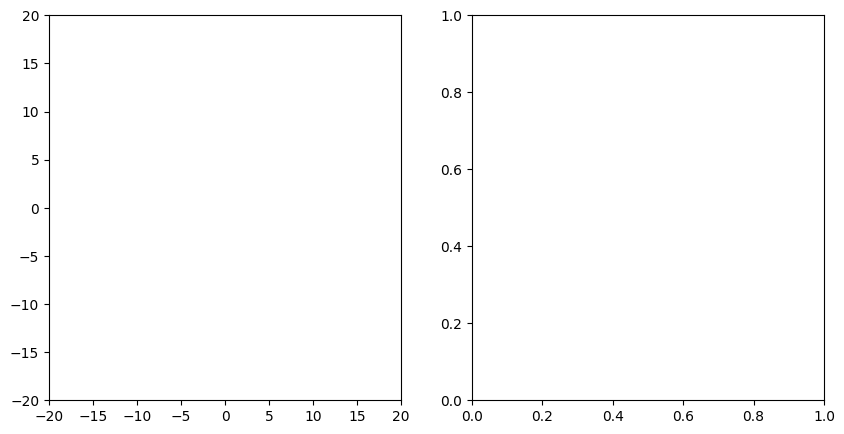

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [17]:

Animation.save('EsferaDura.gif', writer='pillow',fps=10)

### Puntos a y b
##### Grafica del momento angular en "x" y en "y"

In [10]:
MomentumT = Particles[0].GetMomentum(scale)
Potential = Particles[0].GetPotentialenergy(scale)


In [11]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))
    Potential = np.add(Potential,Particles[i].GetPotentialenergy(scale))


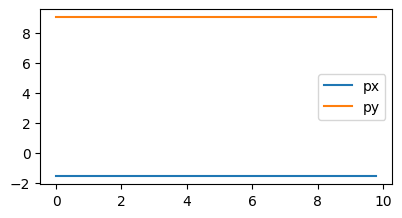

In [12]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()
plt.show()

#### Dado que no estamos teniendo en cuenta la interaccion con los bordes, si no solo la interaccion entre objetos, el momento angular tanto en el eje x como en el eje y se deberia conservar. Esto es lo que se puede observar en la grafica

### Punto D, E y F
##### Grafica de la energia cinetica,potencial y mecanica

In [13]:
KEnergy=Particles[0].GetKineticEnergy(scale)
Pe=Particles[0].GetPotentialenergy(scale)
for i in range(1,len(Particles)):
    KEnergy= np.add(KEnergy,Particles[i].GetKineticEnergy(scale))
    Pe= np.add(Pe,Particles[i].GetPotentialenergy(scale))


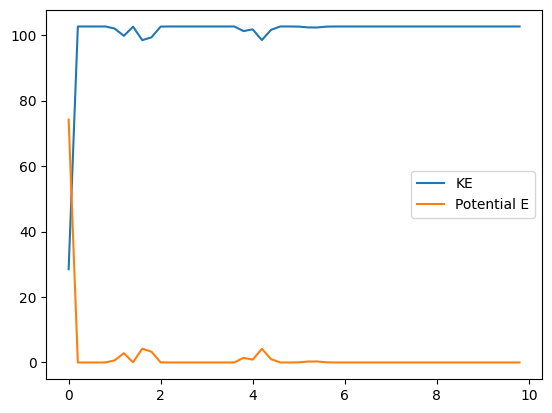

In [14]:
plt.plot(t1,KEnergy,label='KE')
plt.plot(t1,Pe,label='Potential E')
plt.legend()



#### La energía cinética del sistema no se conserva, es decir no se mantiene constante en todo tiempo t. Esto se debe a que cuando los objetos están chocando unos con otros, se acumula energía potencial debido a la compresión de estos. 



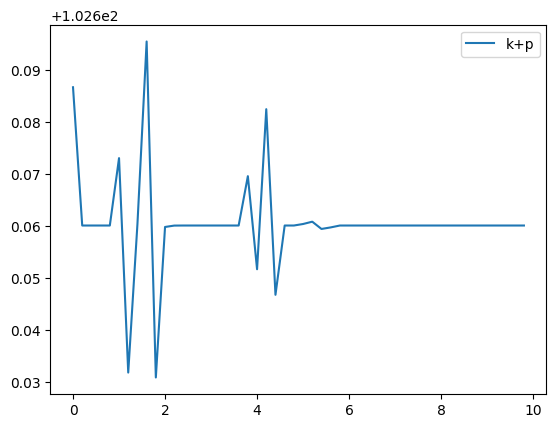

In [15]:
plt.plot(t1,KEnergy+Pe,label=('k+p'))
plt.legend()

#### Sin embargo, como se puede observar en la gráfica, la energía total del sistema(mecánica) pareciera no mantenerse constante en todo tiempo t, sin embargo, esto se debe principalmente a que el metodo se Euler no es el metodo mas preciso que existe, y por eso puede presentar impresiciones. 
#### No obstante, estas diferencias son variaciones bastante pequeñas, por lo tanto, físicamente se puede decir que en la simulación la energía total del sistema se está conservando, lo que es lo esperado ya que no hay presencia de fuerzas externas 

### Punto G

Si se cumple el teorema del trabajo y la energia. Como se puede observar en la grafia de energia potencia y cinetica, el cambio en la energia cinetica es proporcional al cambio en la energia potencial.Lo cual es lo esperado ya que el teorema estable que el cambio en la energia potencia es igual al trabajo, y en este caso este es la energia potencial

### Punto (h)

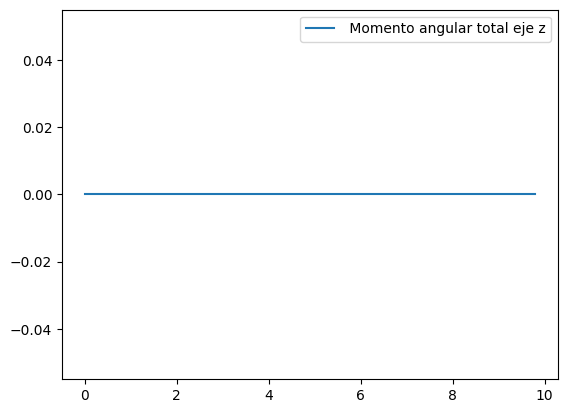

In [16]:
pz=Particles[0].GetPz(scale)
for p in range(1,len(Particles)):
    pz+= Particles[p].GetPz(scale)
    

plt.plot(t1,pz,label=' Momento angular total eje z')
plt.legend()


### Punto (i)

Si extendiéramos la simulación de 2D a 3D, dado que se está inicializando con velocidad en solo los ejes "x,y" no habría ningún movimiento en el eje Z  ya que no hay momento lineal en este eje, ni momento angular (Como se calculo en el punto anterior), y ninguna choque que pudiera producirlo, las particulas no se moverian por el volumen del plano 3D.
